In [1]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np

import scipy.special as sp
from scipy import integrate

from sklearn import metrics

from scipy.stats import multivariate_normal

from scipy.stats import shapiro
from scipy.stats import anderson

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.mixture import BayesianGaussianMixture

from sklearn import naive_bayes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict


from sklearn import svm
from imblearn.over_sampling import SMOTE, ADASYN


In [2]:
def asy1(estimator, X, y):
    Penalty_1 = np.array([[-10,10], [1,0]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_1[y, answ])
    
def asy2(estimator, X, y):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_2[y, answ])

def num(estimator, X, y):
    answ = np.int64(estimator.predict(X))
    return np.sum(np.abs(answ - y) > 0)

def _num(y1, y2):
    return np.sum(np.abs(y1 - y2) > 0)

def _acc(y1, y2):
    return np.sum(y1 == y2)

def _asy1(y1, y2):
    Penalty_1 = np.array([[-10,10], [1,0]])
    return np.sum(Penalty_1[y1, y2])

def _asy2(y1, y2):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    return np.sum(Penalty_2[y1, y2])



In [3]:
def replace_outliers(X, alpha):
    num_features = X.shape[1]
    q_low = X.quantile(alpha, axis=0)
    q_up = X.quantile(1 - alpha, axis=0)
    X_new = X.values.copy()
    for i in range(num_features):
        median = X[i].median()
        for j in range(X.shape[0]):
            if X_new[j][i] < q_low[i] or X_new[j][i] > q_up[i]:
                X_new[j][i] = median
    return X_new
        
    
def comp(X, lower, upper):
    outliers = []
    for i in range(X.shape[0]):
        if np.sum(X[i] < lower) + np.sum(X[i] > upper) > 0:
            outliers.append(i)
    return outliers
 
def check_outliers(X, alpha = 0.25):
    q25 = X.quantile(alpha, axis=0)
    q75 = X.quantile(1-alpha, axis=0)
    iqr = q75 - q25
    cut_off = iqr * 1.75
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = comp(X.values, lower, upper)
    return outliers

In [4]:
np.random.seed(0)

In [5]:
X_train_load = pd.read_csv('./data/task1_5_learn_X.csv',header=None, sep=' ').as_matrix()
y_train_load = np.reshape(np.int64(pd.read_csv('./data/task1_5_learn_y.csv',header=None, sep=' ').as_matrix()), -1)

X_test_load = pd.read_csv('./data/task1_5_test_X.csv',header=None, sep=' ').as_matrix()

In [6]:
pd.DataFrame(X_train_load[np.where(y_train_load==0)]).describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,...,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,51.217510,40.010900,266.641564,151.310718,188.550365,20.668682,246.017131,35.003113,248.643614,40.011008,...,6.570545,121.348152,58.112808,-29.185405,0.690829,-6.591668,270.041628,-292.672099,379.606797,-27.023733
std,1916.980653,1497.516499,9979.856140,5663.234926,7057.019655,773.590087,9208.037085,1310.098923,9306.213137,1497.505170,...,5446.761379,4382.164948,2091.557347,7545.961821,529.603094,1231.532474,5423.923011,8271.161462,7335.915924,956.598566
min,-6640.748129,-5187.644170,-34571.899053,-19618.408527,-24446.869206,-2679.851205,-31898.337622,-4538.401901,-32238.118667,-5187.603523,...,-16412.742421,-13441.165313,-7216.154021,-26317.493525,-1440.640200,-3737.641531,-16044.440120,-27638.483247,-24054.671596,-2748.341010
25%,-1180.119209,-921.901240,-6143.636109,-3486.483723,-4344.388951,-476.228417,-5668.779002,-806.522801,-5729.103624,-921.885820,...,-3462.148238,-2777.027771,-1297.072343,-5273.055435,-358.466169,-864.064167,-3303.140474,-6032.867444,-4643.568352,-639.110908
50%,-11.806047,-9.199941,-61.504062,-34.846866,-43.687624,-4.776866,-56.750160,-8.052006,-57.325787,-9.210766,...,173.832986,130.435697,16.350993,-50.957639,-21.609337,-27.487198,62.914775,-175.174578,491.955592,-74.822854
75%,1452.603755,1134.732730,7562.363326,4291.294985,5347.571160,586.194835,6977.655975,992.735002,7051.809507,1134.740120,...,3530.812431,3112.717474,1490.956269,5234.042278,364.798303,817.081198,4081.902732,5759.704247,5687.515246,633.657897
max,5637.328736,4403.785574,29348.110905,16654.108107,20752.854650,2274.923828,27078.324382,3852.654052,27366.986911,4403.755830,...,18302.328234,12276.952334,6434.242120,25490.401150,1703.633296,4308.371014,14656.687160,20549.919473,22916.561208,3339.002276


In [7]:
print(X_train_load.shape)
print(y_train_load.shape)
print(X_test_load.shape)


(1000, 50)
(1000,)
(10000, 50)


In [8]:
# X_train_load = replace_outliers(pd.DataFrame(X_train_load), 0.0141)
# X_test_load = replace_outliers(pd.DataFrame(X_test_load), 0.0141)

In [9]:
# skb = SelectKBest(f_classif, k=1)
skb = SelectKBest(mutual_info_classif, k=1)
skb.fit(X_train_load, y_train_load)



SelectKBest(k=1, score_func=<function mutual_info_classif at 0x1144b7b70>)

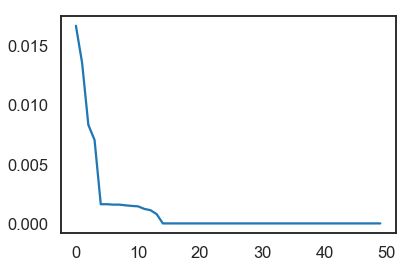

In [10]:
plt.plot(np.sort(skb.scores_)[::-1])

In [11]:
np.sort(skb.scores_)[::-1][:15]

array([ 0.01671327,  0.01355971,  0.0083354 ,  0.00705872,  0.00162274,
        0.00162274,  0.00158826,  0.00158826,  0.00152828,  0.00147967,
        0.00144242,  0.00122967,  0.00111881,  0.00078548,  0.        ])

In [12]:
skb.k = 50

In [13]:
X = skb.transform(scale(np.vstack([X_train_load, X_test_load])))
# X = skb.transform(np.vstack([X_train_load, X_test_load]))
# X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train = X[:X_train_load.shape[0]]
X_test = X[X_train_load.shape[0]:]

y_train = np.array(y_train_load)




In [14]:
print(_asy1(y_train, y_train), _asy2(y_train, y_train))
print(np.sum(y_train))

-8250 -1000
175


In [15]:
# plt.figure(figsize=(15,8))
# sns.heatmap(pd.DataFrame(X_train).corr(), annot=True)

In [16]:
saved_features = [0, 10, 20, 30, 40, 41,42,43,44,45,46,47,48,49]
# saved_features = [0, 10, 11, 12, 13]
X_train = X_train[:,saved_features]
X_test = X_test[:,saved_features]

In [17]:
# plt.figure(figsize=(15,8))
# sns.heatmap(pd.DataFrame(X_train).corr(), annot=True)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1000, 14)
(1000,)
(10000, 14)


In [19]:
X_train_new, y_train_new = SMOTE().fit_sample(X_train, y_train)
X_test_new = np.array(X_test)

In [20]:
print(X_train_new.shape, X_test_new.shape)

(1650, 14) (10000, 14)


In [21]:
print(_asy1(y_train_new, y_train_new), _asy2(y_train_new, y_train_new))
print(np.sum(y_train_new))

-8250 -1650
825


In [22]:
rho = 0.5
Predict = cross_val_predict(estimator=svm.SVC(probability=True, kernel='rbf'), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_AUC = svm.SVC(probability=True, kernel='rbf').fit(X_train_new, y_train_new).predict(X_test_new)
Predict_For_NUM = svm.SVC(probability=True, kernel='rbf').fit(X_train_new, y_train_new).predict(X_test_new)





ACC 0.816363636364
AUC 0.888959412305
NUM 303
ASY1 -4774
ASY2 -877


In [23]:
rho = 0.9
Predict = cross_val_predict(estimator=svm.SVC(probability=True, kernel='rbf'), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_ASY1 = svm.SVC(probability=True, kernel='rbf').fit(X_train_new, y_train_new).predict(X_test_new)




ACC 0.573939393939
AUC 0.890267768595
NUM 703
ASY1 -7319
ASY2 -232


In [24]:
rho = 0.66
Predict = cross_val_predict(estimator=svm.SVC(probability=True, kernel='rbf'), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_ASY2 = svm.SVC(probability=True, kernel='rbf').fit(X_train_new, y_train_new).predict(X_test_new)




ACC 0.816363636364
AUC 0.889995224977
NUM 303
ASY1 -6237
ASY2 -954


In [25]:
pd.DataFrame(np.vstack([Predict_For_AUC, Predict_For_NUM, Predict_For_ASY1, Predict_For_ASY2]).T).to_csv('task1_5_answ.csv', sep = ',')
